# Proyecto 2 - Support Vector Machines (SVM)
Github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

In [1]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
from sklearn.neural_network import MLPClassifier, MLPRegressor

import os
os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.exceptions import ConvergenceWarning  # Still import for completeness
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Optional but safe

In [177]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [179]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Seleccion de variables para entrenamiento

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Variables eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que contengan un valor nulo en algunas de sus variables restantes..

In [180]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

## Creación de variable respuesta

Se busca categorizar las casas de acuerdo a sus precios en 3 categorías: 
- económicas
- intermedias
- caras

Así que se creo una variable respuesta `SalePriceCategory` para contener estas categorías.

In [181]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

## Análisis de multicolinealidad

En entregas pasadas ya se había analizado la correlación entre las variables del dataset con la variable respuesta de `SalePrice`. Se decidió usar el criterio de ignorar a todas las variables que tuvieran un coeficiente de correlación de Pearson mayor a 60% (r > 0.6) ya que representan las características con mayor impacto en el valor final de la propiedad. Con base en este criterio, las variables seleccionadas para entrenar el modelo son:

- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces
- GrLiveArea
- TotalBsmtSF
- GarageArea

## Set de prueba y test

Fue dividido en un ratio de 70% entrenamiento 30% test.

In [182]:
X = df_cleaned.drop(["SalePriceCategory", "SalePrice"], axis=1)
y = df_cleaned["SalePriceCategory"]
y_regresion = df_cleaned["SalePrice"]
data_train, data_test,target_train, target_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=0)

data_train_r, data_test_r,target_train_r, target_test_r = train_test_split(X, y_regresion, test_size=0.3,train_size=0.7,random_state=0)

## Preprocesamiento de los datos

Antes de ser pasados al modelo para entrenamiento, los datos númericos fueron estandárizados, y los categóricos códificados usando el método `OneHotEncoder`.

In [183]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Preprocessors
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("Standar Scaler", numeric_preprocessor, numerical_cols),
        ("Onehot encoder", categorical_preprocessor, categorical_cols),
    ]
)

preprocessors = make_pipeline(preprocessor)
set_config(display='diagram')
preprocessors

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Standar Scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))]))])

## 1er modelo clasificación

Para el modelo de clasificación se decidió usar una función de activación logística, además de usar 2 capas ocultas con tamaños variables.

In [184]:
mlp_pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(activation="logistic", random_state=42, verbose=False))
])

param_grid_1 = {
    'classifier__max_iter': (100,200,500,1000),
    'classifier__learning_rate_init': (0.01, 0.1, 1,10),
    'classifier__hidden_layer_sizes': [
    (4, 3), (5, 3), (6, 4), (7, 3), (8, 5), (5,)
]
}



mlp_model_1 = GridSearchCV(mlp_pipeline_1, param_grid_1, cv=5, scoring="accuracy", n_jobs=-1)
mlp_model_1.fit(data_train, target_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Standar '
                                                                         'Scaler',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF...
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                                       ('classifier',
                                        MLPClassifier(activation='logistic',
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__hidden_layer_sizes': [(4, 3), (5, 3),
                                                            (6, 4), (7, 3),
                                                            (8, 5), (5,)],
                         'classifier__learning_rate_init': (0.01, 0.1, 1, 10),
                         'classifier__max_iter': (100, 200, 500, 1000)},
             scoring='accuracy')

Mejor configuración Modelo 1: {'classifier__hidden_layer_sizes': (5,), 'classifier__learning_rate_init': 0.01, 'classifier__max_iter': 100}
Accuracy Modelo 1 entrenamiento: 0.9843
Accuracy Modelo 1: 0.8267


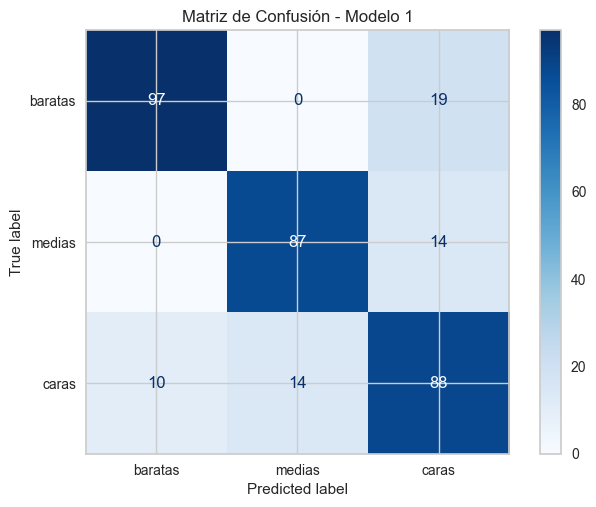

In [185]:
print("Mejor configuración Modelo 1:", mlp_model_1.best_params_)
y_pred_2 = mlp_model_1.predict(data_train)
acc_2 = accuracy_score(target_train, y_pred_2)
print(f"Accuracy Modelo 1 entrenamiento: {acc_2:.4f}")
y_pred_1 = mlp_model_1.predict(data_test)
acc_1 = accuracy_score(target_test, y_pred_1)
print(f"Accuracy Modelo 1: {acc_1:.4f}")

# Modelo 1
ConfusionMatrixDisplay.from_estimator(mlp_model_1, data_test, target_test, display_labels=["baratas", "medias", "caras"], cmap="Blues")
plt.title("Matriz de Confusión - Modelo 1")
plt.show()



## 2do modelo clasificación

Para el siguiente modelo se decidió probar usar "tanh" como función de activación. El resto de ajusto de hiperparámetros se mantuvo igual.

In [186]:
mlp_pipeline_2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(activation="tanh",  random_state=42, verbose=False))
])

param_grid_2 = {
    'classifier__max_iter': (100,200,500,1000),
    'classifier__learning_rate_init': (0.01, 0.1, 1,10),
    'classifier__hidden_layer_sizes': [
        (5,), (10,), (20,),
        (10, 5), (20, 10),
        (50, 30, 10), (100,)
    ]
}

mlp_model_2 = GridSearchCV(mlp_pipeline_2, param_grid_2, cv=5, scoring="accuracy", n_jobs=-1)
mlp_model_2.fit(data_train, target_train)

print("Mejor configuración Modelo 2:", mlp_model_2.best_params_)


Mejor configuración Modelo 2: {'classifier__hidden_layer_sizes': (20,), 'classifier__learning_rate_init': 0.1, 'classifier__max_iter': 100}


Mejor configuración Modelo 2: {'classifier__hidden_layer_sizes': (20,), 'classifier__learning_rate_init': 0.1, 'classifier__max_iter': 100}
Accuracy en entrenamiento (Modelo 2): 0.9961
Accuracy Modelo 2: 0.8146


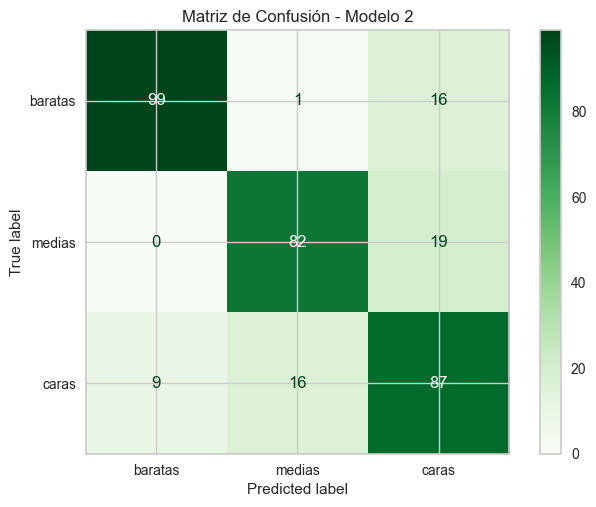

In [187]:
print("Mejor configuración Modelo 2:", mlp_model_2.best_params_)
# Predicciones sobre el conjunto de entrenamiento
y_train_pred_2 = mlp_model_2.predict(data_train)

# Accuracy sobre entrenamiento
acc_train_2 = accuracy_score(target_train, y_train_pred_2)

print(f"Accuracy en entrenamiento (Modelo 2): {acc_train_2:.4f}")
y_pred_2 = mlp_model_2.predict(data_test)
acc_2 = accuracy_score(target_test, y_pred_2)
print(f"Accuracy Modelo 2: {acc_2:.4f}")
# Modelo 2
ConfusionMatrixDisplay.from_estimator(mlp_model_2, data_test, target_test, display_labels=["baratas", "medias", "caras"], cmap="Greens")
plt.title("Matriz de Confusión - Modelo 2")
plt.show()


## Comparación modelos de clasificación

| modelo de RNA activacion | Accuracy training | Accuracy test |
| -----  | -----  | ---- |
| logistic | 0.9843 | 0.8267 |
| tanh | 0.9961 | 0.8146 |

Ambos modelos aprenden bastante bien los datos de entrenamiento, pero bajan en acurracy. Este bajon no es tan significativo como para decir sobreajuste pero si son algo leves.El modelo con función de activación logística presentó un rendimiento ligeramente superior en precisión general (82.67%) frente al modelo con activación tanh (81.46%). Sin embargo, esta mejora vino con un mayor costo computacional, ya que el entrenamiento del modelo logistic fue significativamente más lento. En cuanto a las equivocaciones, ambos modelos mostraron dificultades para clasificar correctamente los productos de la clase caras, siendo esta la categoría con más confusiones. A pesar de ello, el modelo logistic mantuvo un mejor balance entre todas las clases, siendo el más robusto en predicciones. Por su parte, el modelo tanh, aunque más eficiente, presentó mayor tendencia a confundir clases intermedias. Esto sugiere que el modelo logistic podría preferirse cuando la prioridad es la precisión, mientras que tanh es más adecuado en escenarios donde el rendimiento computacional es lo mas importante.

## Sobreajuste
Al analizar los resultados de precisión sobre los conjuntos de entrenamiento y prueba, se observa que ambos modelos presentan un grado de sobreajuste, aunque es leve y no afecta mucho al desempeño. El Modelo 1 alcanza una precisión de 98.43% en entrenamiento frente a 82.67% en prueba, mientras que el Modelo 2  obtiene 99.61% en entrenamiento y 81.46% en prueba. Esta diferencia entre rendimientos indica que los modelos aprenden muy bien los datos de entrenamiento, pero pierden algo de generalización al enfrentarse a nuevos datos. Sin embargo, dado que las precisiones en prueba se mantienen relativamente altas, el sobreajuste puede considerarse moderado. Es decir, existe, pero no compromete gravemente el desempeño del modelo. El Modelo 1 presenta un mejor equilibrio entre ambos conjuntos, lo cual lo hace más confiable para ser utilizado en predicción.

In [188]:
mlp_pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(activation="logistic", random_state=42, verbose=False))
])

param_grid_mejorado = {
    'classifier__hidden_layer_sizes': [(5,), (6,), (5, 2)],
    'classifier__learning_rate_init': [0.001, 0.005, 0.01],
    'classifier__alpha': [0.0001, 0.001, 0.01], 
    'classifier__max_iter': [300, 500] 
}



mlp_model_1 = GridSearchCV(mlp_pipeline_1, param_grid_mejorado, cv=5, scoring="accuracy", n_jobs=-1)
mlp_model_1.fit(data_train, target_train)

print("Mejor configuración Modelo 1:", mlp_model_1.best_params_)


Mejor configuración Modelo 1: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (5,), 'classifier__learning_rate_init': 0.001, 'classifier__max_iter': 300}


Accuracy Modelo 1 entrenamiento: 0.9503
Accuracy Modelo 1: 0.8389


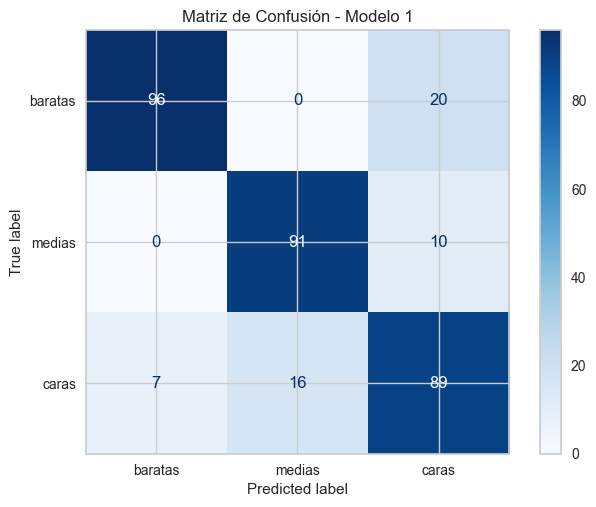

In [189]:
y_pred_2 = mlp_model_1.predict(data_train)
acc_2 = accuracy_score(target_train, y_pred_2)
print(f"Accuracy Modelo 1 entrenamiento: {acc_2:.4f}")
y_pred_1 = mlp_model_1.predict(data_test)
acc_1 = accuracy_score(target_test, y_pred_1)
print(f"Accuracy Modelo 1: {acc_1:.4f}")

# Modelo 1
ConfusionMatrixDisplay.from_estimator(mlp_model_1, data_test, target_test, display_labels=["baratas", "medias", "caras"], cmap="Blues")
plt.title("Matriz de Confusión - Modelo 1")
plt.show()



Se seleccionó como modelo final el que tiene activación logística, al ser el que mostró el mejor equilibrio entre rendimiento y generalización. Tras un re proceso, donde se busco tener un mejor rendimiento ajustando, el número de iteraciones, la regularización y la arquitectura de capas ocultas. se logró reducir el leve sobreajuste detectado inicialmente. El modelo ajustado obtuvo una precisión en entrenamiento de 95.03% y una precisión en prueba de 83.89%, mejorando la distancia entre ambos y demostrando un comportamiento más estable y confiable. La matriz de confusión muestra un alto nivel de aciertos en todas las clases, especialmente en la clase "medias", aunque persisten algunas confusiones en la predicción de productos "caras", lo cual representa una posible área de mejora futura.

## 1er modelo de regresión

In [ ]:
mlp_pipeline_3 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", MLPRegressor(activation="relu", random_state=42, verbose=False))
])

param_grid_3 = {
    'regressor__max_iter': (100, 200, 500, 1000),
    'regressor__learning_rate_init': (0.001, 0.01, 0.1, 1),
    'regressor__hidden_layer_sizes': [
        (4, 3), (5, 3), (6, 4), (7, 3), (8, 5), (5,)
    ]
}

mlp_model_3 = GridSearchCV(mlp_pipeline_3, param_grid_3, cv=5, scoring="r2", n_jobs=-1)
mlp_model_3.fit(data_train_r, target_train_r)

print("Mejor configuración Modelo 1:", mlp_model_3.best_params_)

Mejor configuración Modelo 1: {'regressor__hidden_layer_sizes': (7, 3), 'regressor__learning_rate_init': 0.01, 'regressor__max_iter': 200}


In [196]:
# Predict on train and test
y_train_pred = mlp_model_3.predict(data_train)
y_test_pred = mlp_model_3.predict(data_test_r)

# R²
r2_train = r2_score(target_train_r, y_train_pred)
r2_test = r2_score(target_test_r, y_test_pred)

# MSE & RMSE
mse_train = mean_squared_error(target_train_r, y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(target_test_r, y_test_pred)
rmse_test = np.sqrt(mse_test)

# AIC and BIC (manually computed for linear-like models)
def calculate_aic_bic(y_true, y_pred, num_params):
    n = len(y_true)
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    aic = n * np.log(sse / n) + 2 * num_params
    bic = n * np.log(sse / n) + num_params * np.log(n)
    return aic, bic

# Estimate number of parameters (roughly: weights + biases)
num_params = np.sum([np.prod(w.shape) for w in mlp_model_3.best_estimator_.named_steps["regressor"].coefs_])
num_params += np.sum([len(b) for b in mlp_model_3.best_estimator_.named_steps["regressor"].intercepts_])

aic_train, bic_train = calculate_aic_bic(target_train_r, y_train_pred, num_params)
aic_test, bic_test = calculate_aic_bic(target_test_r, y_test_pred, num_params)

# Print results
print(f"Train R²: {r2_train:.4f} | MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | AIC: {aic_train:.2f} | BIC: {bic_train:.2f}")
print(f"Test  R²: {r2_test:.4f} | MSE: {mse_test:.4f} | RMSE: {rmse_test:.4f} | AIC: {aic_test:.2f} | BIC: {bic_test:.2f}")


Train R²: 0.7890 | MSE: 1531750372.7780 | RMSE: 39137.5826 | AIC: 19693.50 | BIC: 27845.76
Test  R²: 0.7577 | MSE: 1476802557.6338 | RMSE: 38429.1889 | AIC: 10460.22 | BIC: 17129.90


## 2do modelo regresión

In [197]:
mlp_pipeline_4 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", MLPRegressor(activation="tanh", random_state=42, verbose=False))
])

param_grid_4 = {
    'regressor__max_iter': (100, 200, 500, 1000),
    'regressor__learning_rate_init': (0.001, 0.01, 0.1, 1),
    'regressor__hidden_layer_sizes': [
        (4, 3), (5, 3), (6, 4), (7, 3), (8, 5), (5,)
    ]
}

mlp_model_4 = GridSearchCV(mlp_pipeline_4, param_grid_4, cv=5, scoring="r2", n_jobs=-1)
mlp_model_4.fit(data_train_r, target_train_r)

print("Mejor configuración Modelo 1:", mlp_model_3.best_params_)

Mejor configuración Modelo 1: {'regressor__hidden_layer_sizes': (7, 3), 'regressor__learning_rate_init': 0.01, 'regressor__max_iter': 200}


In [ ]:
# Predict on train and test
y_train_pred = mlp_model_4.predict(data_train)
y_test_pred = mlp_model_4.predict(data_test_r)

# R²
r2_train = r2_score(target_train_r, y_train_pred)
r2_test = r2_score(target_test_r, y_test_pred)

# MSE & RMSE
mse_train = mean_squared_error(target_train_r, y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(target_test_r, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Estimate number of parameters (roughly: weights + biases)
num_params = np.sum([np.prod(w.shape) for w in mlp_model_4.best_estimator_.named_steps["regressor"].coefs_])
num_params += np.sum([len(b) for b in mlp_model_4.best_estimator_.named_steps["regressor"].intercepts_])

aic_train, bic_train = calculate_aic_bic(target_train_r, y_train_pred, num_params)
aic_test, bic_test = calculate_aic_bic(target_test_r, y_test_pred, num_params)

# Print results
print(f"Train R²: {r2_train:.4f} | MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | AIC: {aic_train:.2f} | BIC: {bic_train:.2f}")
print(f"Test  R²: {r2_test:.4f} | MSE: {mse_test:.4f} | RMSE: {rmse_test:.4f} | AIC: {aic_test:.2f} | BIC: {bic_test:.2f}")


Train R²: -3.6558 | MSE: 33797975693.7375 | RMSE: 183842.2576 | AIC: 22600.41 | BIC: 32005.43
Test  R²: -4.4662 | MSE: 33318053920.0332 | RMSE: 182532.3366 | AIC: 12025.46 | BIC: 19720.07
